## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: GM12878

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[1]
cell_line

'GM12878'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [8]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV, plot_scores

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [7]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [8]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [10]:
model=FFNN

In [11]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:26,536] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:26,756] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4239196251227831
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    lr: 0.003417910532611283
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 64
    optimizer: Nadam
    weight_decay: 0.00045942624971673696

===============> MODEL TESTING
AUPRC test score: 0.4545426661493305


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:26,925] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1_2_3' instead of creating a new one.


  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4264296059320551
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.4
    dropout_l2: 0.5
    dropout_l3: 0.4
    lr: 0.014878918471340213
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 16
    n_units_l2: 32
    n_units_l3: 4
    optimizer: Adam
    weight_decay: 0.0004536564059593263

===============> MODEL TESTING
AUPRC test score: 0.44706711032339413


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4120941007371743
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.5
    dropout_l3: 0.0
    lr: 2.7544602863266492e-05
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 64
    n_units_l2: 16
    n_units_l3: 4
    optimizer: Adam
    weight_decay: 0.0009241086328147328

===============> MODEL TESTING
A

In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [10]:
model=CNN

In [11]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:27:59,426] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2106816771444083
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 15
    lr: 0.0004722881696063211
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 64
    weight_decay: 0.004415640761947287

===============> MODEL TESTING
AUPRC test score: 0.21547459101926145


>>> ITERATION N. 2


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:03,506] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2036245599239026
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 11
    kernel_size_l2: 5
    lr: 3.916227060779651e-05
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 64
    weight_decay: 0.06038607394944844

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:04,160] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.1872839083472893


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2113115452206233
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    dropout_l2: 0.4
    dropout_l3: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 11
    kernel_size_l2: 15
    kernel_size_l3: 5
    lr: 0.00018044919038351503
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 96
    out_channels_l2: 64
    out_channels_l3: 256
    weight_decay: 0.020226202569430356

===============> MODEL TESTING
AUPRC test score: 0.21539841863746012



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20605


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [9]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [10]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [16]:
model=FFNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:30,973] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3425928784251161
  Params: 
    dropout_l0: 0.0
    lr: 0.0036918062339858356
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.0008549609538543527

===============> MODEL TESTING
AUPRC test score: 0.3379830406673466


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:31,157] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:31,328] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.33265078915684665
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.3
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 6.728113276823955e-05
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 64
    n_units_l2: 4
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.0003631637141408172

===============> MODEL TESTING
AUPRC test score: 0.33787162755364225


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3376073202022231
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.4
    lr: 0.024061118058980955
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 64
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.003621989489045219

===============> MODEL TESTING
AUPRC test score: 

In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [16]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:13,394] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.23460648814157367
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 15
    lr: 0.00038763603469719397
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 64
    weight_decay: 0.00033289858402281566

===============> MODEL TESTING
AUPRC test score: 0.23955196067352968




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:15,330] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.22221255163536632
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 6.106010799535309e-05
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 64
    weight_decay: 0.006277594145059672

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:16,260] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.23894641559037355


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24372015546483908
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.00015792225640183144
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 96
    weight_decay: 0.004804921297144198

===============> MODEL TESTING
AUPRC test score: 0.2337983225464828



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.23743


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [11]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [12]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [22]:
model=FFNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:34,094] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:34,226] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8416849874868607
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    dropout_l2: 0.4
    dropout_l3: 0.5
    lr: 0.002401793726819719
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 16
    n_units_l2: 64
    n_units_l3: 4
    optimizer: Adam
    weight_decay: 0.0011656838373785867

===============> MODEL TESTING
AUPRC test score: 0.8611439880757605


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:34,468] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8502686395554595
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.2
    lr: 0.02343344190141199
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 64
    optimizer: Adam
    weight_decay: 0.00042073517148887886

===============> MODEL TESTING
AUPRC test score: 0.8522487533014428


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8288095261531242
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.2
    lr: 0.001730279544668209
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.01254460072832661

===============> MODEL TESTING
AUPRC test score: 0.8294393430445095



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.84761


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [22]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:19,372] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7707804143041284
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 11
    lr: 0.016121308273637825
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 96
    weight_decay: 0.0003409244156556936

===============> MODEL TESTING
AUPRC test score: 0.7772035465666317




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:20,948] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8038728399091112
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0
    dropout_l2: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 11
    lr: 0.002879553274358372
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 96
    weight_decay: 0.0009668087741276806

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:21,751] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.710407499935556


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7810869031438135
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 0.001144770657635339
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.0016292821818027021

===============> MODEL TESTING
AUPRC test score: 0.7987596382385099



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.76212


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [13]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [14]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [28]:
model=FFNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:38,123] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5592524945132102
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    lr: 0.009985622774989305
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 64
    optimizer: RMSprop
    weight_decay: 0.0010388179453708136

===============> MODEL TESTING
AUPRC test score: 0.5659018247498431


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:38,555] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5612022093266218
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.4
    lr: 0.00035471635814814714
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 128
    n_units_l2: 4
    optimizer: RMSprop
    weight_decay: 0.0014560831368067698

===============> MODEL TESTING
AUPRC test score: 0.5672649127967739




/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 09:15:38,815] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5598421838467655
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    dropout_l2: 0.0
    lr: 0.018863887200787716
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 64
    n_units_l2: 32
    optimizer: RMSprop
    weight_decay: 0.0006641177884153326

===============> MODEL TESTING
AUPRC test score: 0.5156448657511983



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.5496


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [28]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:34,186] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5403720073495814
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 5
    lr: 0.001933700241523081
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 64
    weight_decay: 0.011315997319825891

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:35,013] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.5344998135458073


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5456214361426641
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 11
    lr: 0.000160043806892471
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 64
    weight_decay: 0.03980402334624298

===============> MODEL TESTING
AUPRC test score: 0.5460979074078119


>>> ITERATION N. 3


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:36,079] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5506130224263174
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 5
    lr: 1.6643291033453538e-05
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 32
    weight_decay: 0.00013123090663796794

===============> MODEL TESTING
AUPRC test score: 0.5472468526316302



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.54261


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [15]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [16]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [10]:
model=FFNN

In [11]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:27:23,731] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.33757822736010795
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.3
    lr: 0.018148415737346088
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.0005990272893467435

===============> MODEL TESTING
AUPRC test score: 0.3343217126874923


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:27:23,989] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:27:24,170] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3255512431005677
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.5
    dropout_l3: 0.5
    lr: 0.00019600401452753228
    n_layers: 4
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 64
    n_units_l3: 16
    optimizer: RMSprop
    weight_decay: 0.0020475161786481576

===============> MODEL TESTING
AUPRC test score: 0.3290173815033236


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.34529128801598186
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.0
    lr: 0.00036615333881302606
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 16
    optimizer: Nadam
    weight_decay: 0.00022482470523109058

===============> MODEL TESTING
AUPRC test score: 0.3373671848946358



3-FOLD CROSS

In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [34]:
model=CNN

In [35]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


[I 2021-10-13 12:28:53,424] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1810094915274325
  Params: 
    dropout_l0: 0
    kernel_size_l0: 5
    lr: 0.006623173384732201
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 16
    weight_decay: 0.01360111613908758

===============> MODEL TESTING
AUPRC test score: 0.15992394179894173


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:54,456] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20104368688946064
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 15
    lr: 5.706158213968169e-05
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.08659695523690525

===============> MODEL TESTING
AUPRC test score: 0.19816836002707938




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:28:56,599] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20684351177672214
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    dropout_l2: 0.4
    dropout_l3: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 11
    kernel_size_l2: 15
    kernel_size_l3: 5
    lr: 0.00019577984288400818
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 256
    out_channels_l3: 512
    weight_decay: 0.003195945378974415

===============> MODEL TESTING
AUPRC test score: 0.1905353732632853



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.18288


In [36]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [37]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

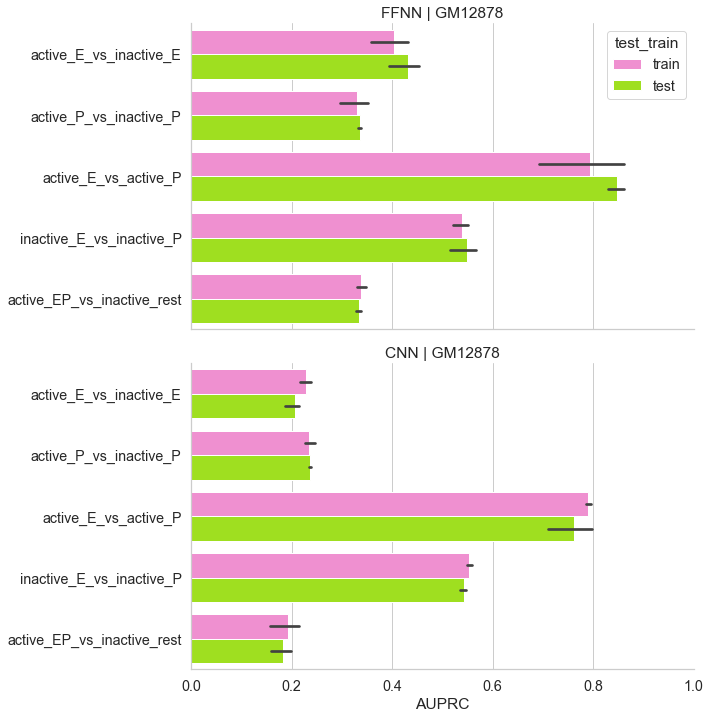

In [9]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])